In [24]:
!pip install -q sentence_transformers protobuf matplotlib

You should consider upgrading via the '/samsung-4tb/cp-eng/pattern/course-projects/pattern-env/bin/python -m pip install --upgrade pip' command.


In [1]:
# %cd /samsung-4tb/cp-eng/pattern/course-projects/
%cd /workspace

import json
import os
import re
from glob import glob

from sentence_transformers import SentenceTransformer, InputExample
from sentence_transformers import models, losses
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

# notebook lib
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = "dataset"
NEWS_DIR = f"{DATA_DIR}/healthcare-news"

/workspace


In [2]:
def load_data(set_name):
    if set_name.lower().strip() == "wordpiece":
        json_paths = sorted(glob(f"{NEWS_DIR}/wordpiece/*.json"))
        return {
            os.path.basename(f_name).split("_")[0]: [
                json.loads(line.strip())
                for line in open(f_name).readlines()
            ]
            for f_name
            in tqdm(json_paths)
        }
    elif set_name.lower().strip() == "sentencepiece":
        return [l.strip() for l in open(f"{NEWS_DIR}/sentencepiece/sentencepiece.txt")]
    elif set_name.lower().strip() == "raw":
        return [l.strip() for l in open(f"{NEWS_DIR}/healthcare-raw.txt")]


def save_raw_text(raw_text, save_path):
    with open(save_path, "w") as f:
        f.writelines([re.sub(r" +", " ", " ".join(t))+"\n" for t in raw_text])

In [3]:
dataset = load_data("raw")

In [4]:
char = set()
# for k, v in dataset.items():
#     for text in v:
#         char = char.union(set("".join(text["Title"])).union(set("".join(text["Detail"]))))
for line in dataset:
    char = char.union(set(line))
char = sorted(char)

print("All characters:\n")
_ = [print(f'"{c}"', end=" ") for c in char]

All characters:

" " "!" """ "#" "%" "&" "'" "(" ")" "*" "+" "," "-" "." "/" "0" "1" "2" "3" "4" "5" "6" "7" "8" "9" ":" ";" "<" "=" ">" "?" "@" "A" "B" "C" "D" "E" "F" "G" "H" "I" "J" "K" "L" "M" "N" "O" "P" "Q" "R" "S" "T" "U" "V" "W" "X" "Y" "Z" "[" "\" "]" "^" "_" "a" "b" "c" "d" "e" "f" "g" "h" "i" "j" "k" "l" "m" "n" "o" "p" "q" "r" "s" "t" "u" "v" "w" "x" "y" "z" "{" "|" "}" "~" "" "" "" "" " " "¬" "­" "®" "°" "²" "µ" "·" "¼" "½" "¾" "Ö" "×" "à" "á" "â" "ã" "ä" "è" "é" "í" "ï" "ñ" "ó" "ô" "ö" "÷" "ü" "ř" "š" "Γ" "Δ" "Ε" "Θ" "α" "β" "ε" "μ" "ก" "ข" "ฃ" "ค" "ฅ" "ฆ" "ง" "จ" "ฉ" "ช" "ซ" "ฌ" "ญ" "ฎ" "ฏ" "ฐ" "ฑ" "ฒ" "ณ" "ด" "ต" "ถ" "ท" "ธ" "น" "บ" "ป" "ผ" "ฝ" "พ" "ฟ" "ภ" "ม" "ย" "ร" "ฤ" "ล" "ว" "ศ" "ษ" "ส" "ห" "ฬ" "อ" "ฮ" "ฯ" "ะ" "ั" "า" "ำ" "ิ" "ี" "ึ" "ื" "ุ" "ู" "ฺ" "฿" "เ" "แ" "โ" "ใ" "ไ" "ๅ" "ๆ" "็" "่" "้" "๊" "๋" "์" "ํ" "๐" "๑" "๒" "๓" "๔" "๕" "๖" "๗" "๘" "๙" "​" "‎" "‏" "‐" "–" "—" "‘" "’" "“" "”" "•" "…" "‪" "′" "″" "‼" "⁣" "₂" "℃" "™" "⅓" "→" "≠" "≤" "≥" "▪" "▶" "●" "♥"

In [5]:
len(raw_text)

NameError: name 'raw_text' is not defined

Healthcare statistics
count    23716.000000
mean       285.999030
std        374.752765
min          0.000000
25%         13.000000
50%         29.000000
75%        473.000000
max       9260.000000
dtype: float64


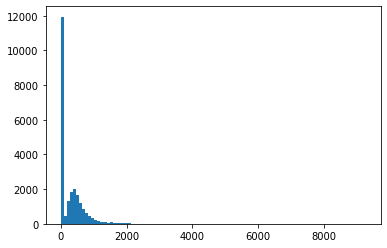

In [39]:
print("Healthcare statistics")

text_len = pd.Series([len(t) for t in raw_text])
print(text_len.describe())
plt.hist(text_len, bins=100)
plt.show()

Wiki TH statistics
count    1.311984e+06
mean     1.694320e+02
std      2.297276e+02
min      2.000000e+00
25%      1.700000e+01
50%      5.600000e+01
75%      2.560000e+02
max      9.797000e+03
dtype: float64


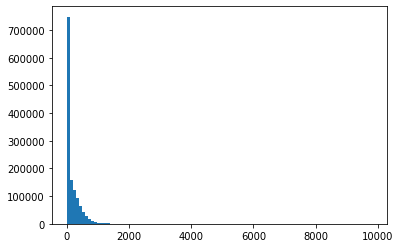

In [38]:
print("Wiki TH statistics")

text_len = pd.Series([len(t) for t in open("dataset/wiki_20210620_clean.txt", "r").readlines()])
print(text_len.describe())
plt.hist(text_len, bins=100)
plt.show()

## Load Model

## Train raw

In [6]:
model_name = 'airesearch/wangchanberta-base-att-spm-uncased'
word_embedding_model = models.Transformer(model_name, max_seq_length=416)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(), pooling_mode='cls')
model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertModel: ['lm_head.bias', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
model.fit?

Signature:
model.fit(
    train_objectives: Iterable[Tuple[torch.utils.data.dataloader.DataLoader, torch.nn.modules.module.Module]],
    evaluator: sentence_transformers.evaluation.SentenceEvaluator.SentenceEvaluator = None,
    epochs: int = 1,
    steps_per_epoch=None,
    scheduler: str = 'WarmupLinear',
    warmup_steps: int = 10000,
    optimizer_class: Type[torch.optim.optimizer.Optimizer] = <class 'transformers.optimization.AdamW'>,
    optimizer_params: Dict[str, object] = {'lr': 2e-05},
    weight_decay: float = 0.01,
    evaluation_steps: int = 0,
    output_path: str = None,
    save_best_model: bool = True,
    max_grad_norm: float = 1,
    use_amp: bool = False,
    callback: Callable[[float, int, int], NoneType] = None,
    show_progress_bar: bool = True,
    checkpoint_path: str = None,
    checkpoint_save_steps: int = 500,
    checkpoint_save_total_limit: int = 0,
)
Docstring:
Train the model with the given training objective
Each training objective is sampled in turn f

In [31]:
import json
import os
import re
from glob import glob

from sentence_transformers import SentenceTransformer, InputExample
from sentence_transformers import models, losses
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

# notebook lib
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = "dataset"
NEWS_DIR = f"{DATA_DIR}/healthcare-news"
DATASET = "raw"
# DATASET = "sentencepiece"
# DATASET = "wordpiece"


def load_data(set_name):
    if set_name.lower().strip() == "wordpiece":
        json_paths = sorted(glob(f"{NEWS_DIR}/wordpiece/*.json"))
        return {
            os.path.basename(f_name).split("_")[0]: [
                json.loads(line.strip())
                for line in open(f_name).readlines()
            ]
            for f_name
            in tqdm(json_paths)
        }
    elif set_name.lower().strip() == "sentencepiece":
        return [l.strip() for l in open(f"{NEWS_DIR}/sentencepiece/sentencepiece.txt")]
    elif set_name.lower().strip() == "raw":
        return [l.strip() for l in open(f"{NEWS_DIR}/healthcare-raw.txt")]

dataset = load_data(DATASET)
for batch_size in [16, 24]:
    for learning_rate in [3e-5, 7e-5, 1e-4]:
        ## load model ##
        # LM models (mBERT, XLM-R, etc.)
        model_name = 'airesearch/wangchanberta-base-att-spm-uncased'
        word_embedding_model = models.Transformer(model_name, max_seq_length=416)
        pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(), pooling_mode='cls')
        model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

        ## load dataset ##
        train_sentences = open("dataset/healthcare-news/healthcare-raw.txt").readlines()
        # Convert train sentences to sentence pairs
        train_data = [InputExample(texts=[s, s]) for s in train_sentences]
        # DataLoader to batch your data
        train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

        # Use the denoising auto-encoder loss
        train_loss = losses.MultipleNegativesRankingLoss(model)

        ##  fit model ##
        model.fit(
            train_objectives=[(train_dataloader, train_loss)],
            epochs=1,
            show_progress_bar=True,
            optimizer_params={'lr': learning_rate},
            output_path='output/simcse-model-wangchanberta',
            save_best_model=True,
            use_amp=True
        )

        model.save(f"weights/wangchanberta-simcse-raw-bs{batch_size}-lr{learning_rate}")

Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/989 [00:00<?, ?it/s]

KeyboardInterrupt: 